In [199]:
import pandas as pd
import seaborn as sns
import os

In [200]:
os.listdir('/home/jupyter-d-ishutenko/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Ivanov')

['data.csv']

In [201]:
start_df = pd.read_csv('/home/jupyter-d-ishutenko/shared/homeworks/python_ds_miniprojects/4/data/2020-12-03/Alexey_Smirnov/data.csv')
start_df['name'] = 'Alexey_Smirnov'
start_df['date'] = '2020-12-03'
start_df

,Unnamed: 0,product_id,quantity,name,date
0,0,47,1,Alexey_Smirnov,2020-12-03
1,1,57,1,Alexey_Smirnov,2020-12-03
2,2,14,2,Alexey_Smirnov,2020-12-03
3,3,52,1,Alexey_Smirnov,2020-12-03
4,4,1,4,Alexey_Smirnov,2020-12-03
5,5,94,4,Alexey_Smirnov,2020-12-03


In [202]:
for path, dirs, files in os.walk('/home/jupyter-d-ishutenko/shared/homeworks/python_ds_miniprojects/4/data'):
    for file in files:
        df = pd.read_csv(path+'/'+file)
        df['name'] = path.split('/')[-1]
        df['date'] = path.split('/')[-2]
        start_df = pd.concat([start_df,df])
start_df = start_df.reset_index(drop = True)


In [203]:
start_df = start_df.drop(columns = 'Unnamed: 0')
start_df = start_df.drop_duplicates()

In [204]:
start_df['quantity'].sum()

480

In [205]:
start_df

,product_id,quantity,name,date
0,47,1,Alexey_Smirnov,2020-12-03
1,57,1,Alexey_Smirnov,2020-12-03
2,14,2,Alexey_Smirnov,2020-12-03
3,52,1,Alexey_Smirnov,2020-12-03
4,1,4,Alexey_Smirnov,2020-12-03
...,...,...,...,...
162,18,4,Petr_Fedorov,2020-12-07
163,94,4,Petr_Fedorov,2020-12-07
164,95,2,Vasiliy_Ivanov,2020-12-07
165,83,3,Vasiliy_Ivanov,2020-12-07


In [206]:
start_df.groupby('name').agg({'quantity':'sum'})

,quantity
name,
Alexey_Fedorov,24
Alexey_Ivanov,17
Alexey_Petrov,7
Alexey_Smirnov,52
Anton_Ivanov,23
Anton_Petrov,18
Anton_Smirnov,45
Kirill_Fedorov,28
Kirill_Petrov,9


In [207]:
start_df

,product_id,quantity,name,date
0,47,1,Alexey_Smirnov,2020-12-03
1,57,1,Alexey_Smirnov,2020-12-03
2,14,2,Alexey_Smirnov,2020-12-03
3,52,1,Alexey_Smirnov,2020-12-03
4,1,4,Alexey_Smirnov,2020-12-03
...,...,...,...,...
162,18,4,Petr_Fedorov,2020-12-07
163,94,4,Petr_Fedorov,2020-12-07
164,95,2,Vasiliy_Ivanov,2020-12-07
165,83,3,Vasiliy_Ivanov,2020-12-07


In [214]:
top_products = start_df.groupby('product_id', as_index = False).agg({'quantity':'sum'}).sort_values(by ='quantity', ascending = False).head(10)

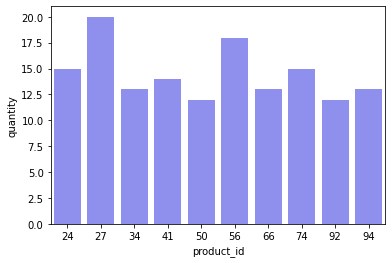

In [216]:
sns.barplot(data=top_products, x='product_id', y='quantity', color = 'blue', alpha = 0.5)

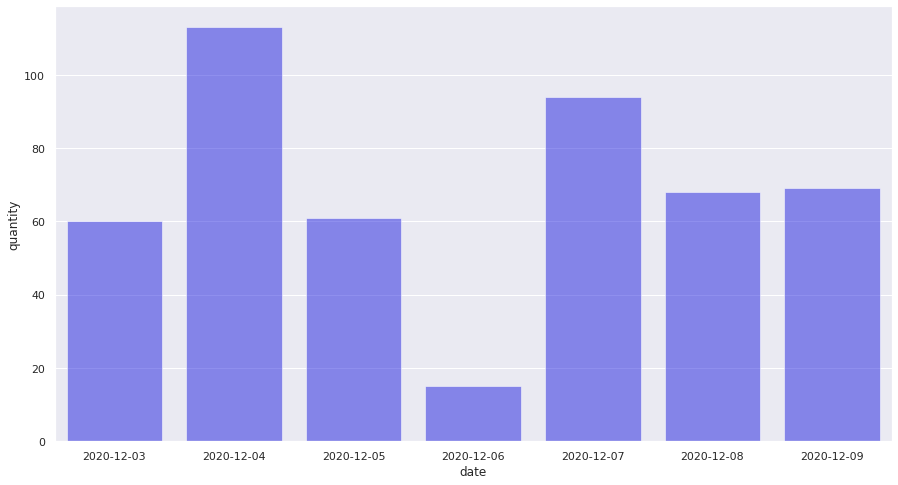

In [218]:
day_quantity = start_df.groupby('date', as_index = False).agg({'quantity':'sum'})
sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(data=day_quantity, x='date', y='quantity', color = 'blue', alpha = 0.5)

In [250]:
order_unique = start_df.drop_duplicates(subset = ['date','product_id','name'])

In [251]:
order_unique

,product_id,quantity,name,date
0,47,1,Alexey_Smirnov,2020-12-03
1,57,1,Alexey_Smirnov,2020-12-03
2,14,2,Alexey_Smirnov,2020-12-03
3,52,1,Alexey_Smirnov,2020-12-03
4,1,4,Alexey_Smirnov,2020-12-03
...,...,...,...,...
162,18,4,Petr_Fedorov,2020-12-07
163,94,4,Petr_Fedorov,2020-12-07
164,95,2,Vasiliy_Ivanov,2020-12-07
165,83,3,Vasiliy_Ivanov,2020-12-07


In [253]:
order_unique.groupby(['name', 'product_id'],as_index = False).agg({'quantity':'count'}).query('quantity > 1')

,name,product_id,quantity
37,Anton_Ivanov,15,2
92,Petr_Fedorov,94,2
